In [139]:
from pauls_functions import *

In [168]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [141]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data_df = pd.DataFrame(data.data, columns=data.feature_names)
data_df['diagnosis'] = data.target
features = data_df.iloc[:, 0:30]
diagnosis = data_df.iloc[:, 30]
orig_cols = data_df.iloc[:, 0:30].columns
# random = 20 #random number to fix seed
from sklearn.model_selection import train_test_split


In [195]:
# X_train = pd.DataFrame(X_train)
# X_test = pd.DataFrame(X_test)
iters = 10

In [206]:
performance_by_iter = pd.DataFrame(columns = ['Rules', "Features", "Rules + Features"], index = np.arange(0, iters))

for iter in range(iters):

    X_train, X_test, y_train, y_test = train_test_split(features, diagnosis, test_size = 0.2, random_state = iter, stratify=diagnosis)

    X_test.name = "X_test"
    X_train.name = "X_train"

    dt_rules_cla_cart , dt_rules_reg_cart, dt_rules_reg_ort, dt_rules_cla_oct = generate_tree(X_train, y_train, X_test, y_test, 3 , 3)

    X_train = gen_rules(X_train, dt_rules_cla_oct)

    X_test = gen_rules(X_test, dt_rules_cla_oct)

    X_train_only_rules = X_train.loc[:, X_train.columns.str.contains("feature")]
    X_test_only_rules = X_test.loc[:, X_test.columns.str.contains("feature")]

    X_train_only_orig = X_train.loc[:, ~X_train.columns.str.contains("feature")]
    X_test_only_orig = X_test.loc[:, ~X_test.columns.str.contains("feature")]

    only_rules_acc = log_regression_pipeline(X_train_only_rules, X_test_only_rules, y_train, y_test)
    only_orig_acc = log_regression_pipeline(X_train_only_orig, X_test_only_orig, y_train, y_test)
    everything_acc = log_regression_pipeline(X_train, X_test, y_train, y_test)

    performance_by_iter.loc[iter, "Rules"] = only_rules_acc
    performance_by_iter.loc[iter, "Features"] = only_orig_acc
    performance_by_iter.loc[iter, "Rules + Features"] = everything_acc


-----------------------------------------------------------------
Regression CART mean performance:  0.720678157196061
Standard Deviation:  0.0


-----------------------------------------------------------------
Classification CART mean performance:  0.9122807017543859
Standard Deviation:  0.0


-----------------------------------------------------------------
Regression ORT mean performance:  0.932748538011696
Standard Deviation:  0.025322380227615182


-----------------------------------------------------------------
Regression ORT mean performance:  0.935672514619883
Standard Deviation:  0.018260228065492386


-----------------------------------------------------------------
Regression CART mean performance:  0.8637823848736104
Standard Deviation:  0.0


-----------------------------------------------------------------
Classification CART mean performance:  0.9473684210526315
Standard Deviation:  0.0


-----------------------------------------------------------------
Regression ORT 

{'whiskers': [<matplotlib.lines.Line2D at 0x1bff2a680>,
 'caps': [<matplotlib.lines.Line2D at 0x1a59ca350>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bff29780>,
 'medians': [<matplotlib.lines.Line2D at 0x1a76b6560>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a76b7340>,
 'means': []}

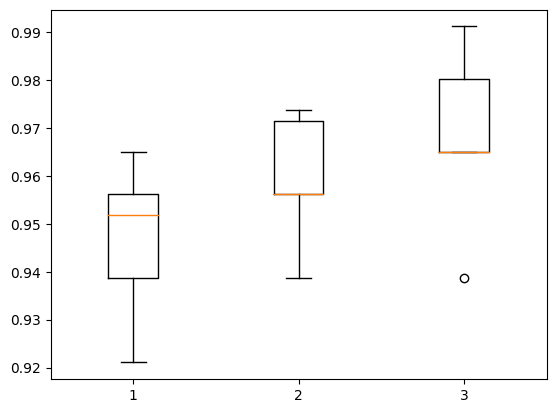

In [207]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.boxplot(performance_by_iter)